Pandas
1) .loc
2) .iloc


In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df= pd.read_excel("C:\\Users\\RIPUDAMAN\\Desktop\\product.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\RIPUDAMAN\\Desktop\\product.xlsx'

In [3]:
df.head(10)

NameError: name 'df' is not defined

In [9]:
df.loc[df['price']==100000]

,pname,price,location,utility,color
2,laptop,100000,delhi,technology,silver
6,Bike,100000,delhi,travel,Dust


.loc statement is equivalent of where clause in sql ,.loc performs same function as where clause in the select.

In [10]:
df.loc[df['price']<100000]

,pname,price,location,utility,color
1,table,30000,noida,dining,black
4,microwave,50000,kerala,kitchen,white
7,covertible sofa,20000,noida,sitting,red
8,tablet,60000,delhi,technology,silver


In [14]:
df.loc[(df['price']>30000) & (df['price']<100000)]

,pname,price,location,utility,color
4,microwave,50000,kerala,kitchen,white
8,tablet,60000,delhi,technology,silver


In [15]:
df['category']= pd.np.nan

to create a new column within the dataframe,use above statement as df['columnname']=pd.np.nan where pd.np.nan create the column whith null values into the existing dataframe

In [16]:
df

,pname,price,location,utility,color,category
0,sofa,500000,delhi,sitting,blue,NaN
1,table,30000,noida,dining,black,NaN
2,laptop,100000,delhi,technology,silver,NaN
3,chairs,500000,noida,sitting,grey,NaN
4,microwave,50000,kerala,kitchen,white,NaN
5,car,1000000,Delhi,travel,blue,NaN
6,Bike,100000,delhi,travel,Dust,NaN
7,covertible sofa,20000,noida,sitting,red,NaN
8,tablet,60000,delhi,technology,silver,NaN


In [19]:
product_mean = df['price'].mean()

In [21]:
print (product_mean)

262222.22222222225


In [24]:
q1_product = df['price'].quantile(0.25)

In [27]:
q3_product = df['price'].quantile(0.75)

In [25]:
print(q1_product)

50000.0


In [28]:
print(q3_product)

500000.0


In [29]:
iqr = q3_product - q1_product

In [30]:
print(iqr)

450000.0


In [31]:
upper_outlier_value = q3_product + 1.5*(iqr)

In [32]:
lower_outlier_value = q1_product + 1.5*(iqr)

In [33]:
print(upper_outlier_value)

1175000.0


In [34]:
print(lower_outlier_value)

725000.0


In [35]:
df.loc[(df['price']>= upper_outlier_value , 'category')] = 'expensive'

we can check any condition with .loc into the given dataframe and can update it accordingly.   

In [36]:
df

,pname,price,location,utility,color,category
0,sofa,500000,delhi,sitting,blue,NaN
1,table,30000,noida,dining,black,NaN
2,laptop,100000,delhi,technology,silver,NaN
3,chairs,500000,noida,sitting,grey,NaN
4,microwave,50000,kerala,kitchen,white,NaN
5,car,1000000,Delhi,travel,blue,NaN
6,Bike,100000,delhi,travel,Dust,NaN
7,covertible sofa,20000,noida,sitting,red,NaN
8,tablet,60000,delhi,technology,silver,NaN


In [37]:
df.loc[(df['price']>= lower_outlier_value , 'category')] = 'economical'

In [38]:
df

,pname,price,location,utility,color,category
0,sofa,500000,delhi,sitting,blue,NaN
1,table,30000,noida,dining,black,NaN
2,laptop,100000,delhi,technology,silver,NaN
3,chairs,500000,noida,sitting,grey,NaN
4,microwave,50000,kerala,kitchen,white,NaN
5,car,1000000,Delhi,travel,blue,economical
6,Bike,100000,delhi,travel,Dust,NaN
7,covertible sofa,20000,noida,sitting,red,NaN
8,tablet,60000,delhi,technology,silver,NaN


In [40]:
df.loc[(df['price'] == max ,'color')] ='most expensive'

In [41]:
df

,pname,price,location,utility,color,category
0,sofa,500000,delhi,sitting,blue,NaN
1,table,30000,noida,dining,black,NaN
2,laptop,100000,delhi,technology,silver,NaN
3,chairs,500000,noida,sitting,grey,NaN
4,microwave,50000,kerala,kitchen,white,NaN
5,car,1000000,Delhi,travel,blue,economical
6,Bike,100000,delhi,travel,Dust,NaN
7,covertible sofa,20000,noida,sitting,red,NaN
8,tablet,60000,delhi,technology,silver,NaN


In [46]:
df.loc[df['price'] == df['price'].max()]

,pname,price,location,utility,color,category
5,car,1000000,Delhi,travel,blue,economical


.max for the find the maximum values for the dataframe


In [47]:
df.loc[df['price']==df['price'].min()]

,pname,price,location,utility,color,category
7,covertible sofa,20000,noida,sitting,red,NaN


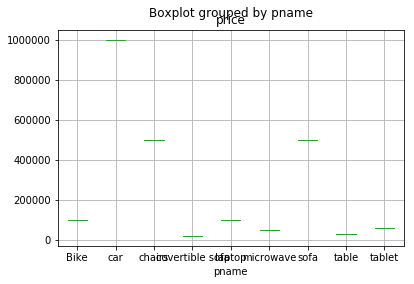

In [65]:
df.boxplot(column = 'price', by ='pname')

In [59]:
df.sort_values('price')

,pname,price,location,utility,color,category
7,covertible sofa,20000,noida,sitting,red,NaN
1,table,30000,noida,dining,black,NaN
4,microwave,50000,kerala,kitchen,white,NaN
8,tablet,60000,delhi,technology,silver,NaN
2,laptop,100000,delhi,technology,silver,NaN
6,Bike,100000,delhi,travel,Dust,NaN
0,sofa,500000,delhi,sitting,blue,NaN
3,chairs,500000,noida,sitting,grey,NaN
5,car,1000000,Delhi,travel,blue,economical


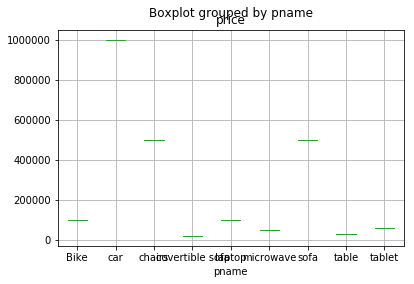

In [66]:
df.boxplot(column = 'price', by ='pname')

In [70]:
df['another_column'] = pd.np.nan

how to replace a particluar value in a column with another value as nan?

In [71]:
df.loc[df['price']>10000,'utility'] == pd.np.nan

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: utility, dtype: bool

In [72]:
df

,pname,price,location,utility,color,category,another_column
0,sofa,500000,delhi,sitting,blue,NaN,NaN
1,table,30000,noida,dining,black,NaN,NaN
2,laptop,100000,delhi,technology,silver,NaN,NaN
3,chairs,500000,noida,sitting,grey,NaN,NaN
4,microwave,50000,kerala,kitchen,white,NaN,NaN
5,car,1000000,Delhi,travel,blue,economical,NaN
6,Bike,100000,delhi,travel,Dust,NaN,NaN
7,covertible sofa,20000,noida,sitting,red,NaN,NaN
8,tablet,60000,delhi,technology,silver,NaN,NaN


# GROUPBY STATEMENT

select pname ,sum(price)
from product
group by pname

In [75]:
df_group = df.groupby('color')

In [76]:
df

,pname,price,location,utility,color,category,another_column
0,sofa,500000,delhi,sitting,blue,NaN,NaN
1,table,30000,noida,dining,black,NaN,NaN
2,laptop,100000,delhi,technology,silver,NaN,NaN
3,chairs,500000,noida,sitting,grey,NaN,NaN
4,microwave,50000,kerala,kitchen,white,NaN,NaN
5,car,1000000,Delhi,travel,blue,economical,NaN
6,Bike,100000,delhi,travel,Dust,NaN,NaN
7,covertible sofa,20000,noida,sitting,red,NaN,NaN
8,tablet,60000,delhi,technology,silver,NaN,NaN


In [77]:
df_group = df.groupby('color')['price'].sum()

any agrregate function such as min , max ,count etc. can be performed in the single line by .groupby() method

In [79]:
print(df_group)

color
Dust       100000
black       30000
blue      1500000
grey       500000
red         20000
silver     160000
white       50000
Name: price, dtype: int64


In [78]:
df

,pname,price,location,utility,color,category,another_column
0,sofa,500000,delhi,sitting,blue,NaN,NaN
1,table,30000,noida,dining,black,NaN,NaN
2,laptop,100000,delhi,technology,silver,NaN,NaN
3,chairs,500000,noida,sitting,grey,NaN,NaN
4,microwave,50000,kerala,kitchen,white,NaN,NaN
5,car,1000000,Delhi,travel,blue,economical,NaN
6,Bike,100000,delhi,travel,Dust,NaN,NaN
7,covertible sofa,20000,noida,sitting,red,NaN,NaN
8,tablet,60000,delhi,technology,silver,NaN,NaN


in data science , if the problem occurs such as the one variable is lossing it significance with another variable in linear regression
then we have to use feature scaling ,to make those two variables equivalent.
age of car   travelled     price
10             50,000       1000000
5              25,000       2000000
(TO MAKE THE TWO VALUES OR VARIABLES COMPARABLE FEATURE SCALING IS USED)

# Feature scaling (Parameteric machine learning)

Min-MAX SCALER ,we use min-max scaler where we are sure that there are no outliers.if theire are outliers in data then again the varibles will lose their significance

2th nov. 2019
koglomerof - smnrrnoff (k-s test)
paired and unpaired data 
all hypothesis tests